In [1]:
import numpy as np

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import math

In [4]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [5]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

[[[ 76 128  88]
  [ 74 126  86]
  [ 74 124  84]
  ...
  [ 93 121  78]
  [ 95 121  81]
  [ 96 120  80]]

 [[ 72 124  84]
  [ 72 124  84]
  [ 73 123  83]
  ...
  [ 94 122  79]
  [ 95 121  81]
  [ 95 119  79]]

 [[ 76 127  89]
  [ 76 127  89]
  [ 77 128  90]
  ...
  [ 94 122  79]
  [ 95 121  81]
  [ 91 117  77]]

 ...

 [[ 29 116  60]
  [ 28 115  59]
  [ 28 115  59]
  ...
  [  2  75  37]
  [  1  74  36]
  [  1  74  36]]

 [[ 30 117  61]
  [ 30 117  61]
  [ 30 117  61]
  ...
  [  2  75  37]
  [  2  75  37]
  [  3  76  38]]

 [[ 32 119  63]
  [ 32 119  63]
  [ 32 119  63]
  ...
  [  0  72  34]
  [  0  73  35]
  [  3  76  38]]]


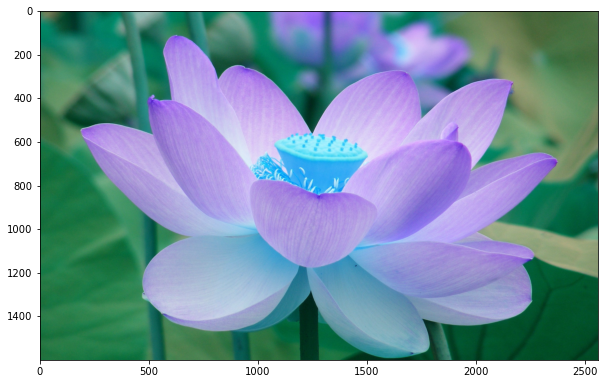

In [6]:
img = cv.imread("9.jpg", cv.IMREAD_UNCHANGED )
showImage(img)
print(img)

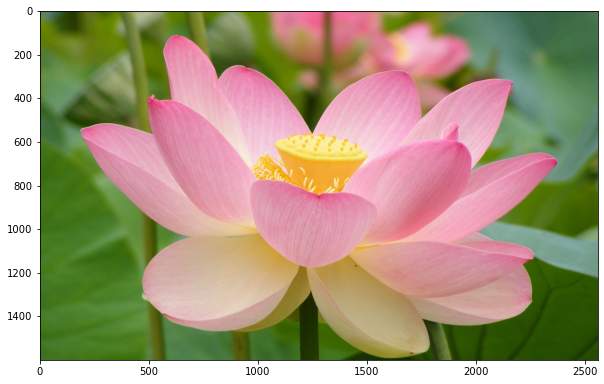

In [7]:
#OpenCV использует цветовую схему BGR, а Matplotlib - RGB. Поэтому нужно преобразовать считанное изображение.
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
showImage(RGB_img)

In [8]:
imageShape = RGB_img.shape
print(imageShape)

(1600, 2560, 3)


In [9]:
grayImage = np.zeros((imageShape[0], imageShape[1]), np.ubyte)

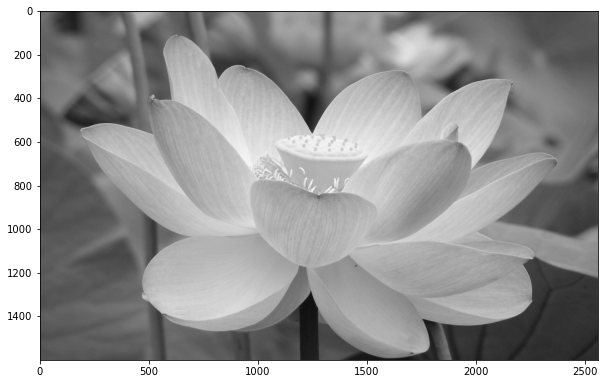

In [10]:
for i in range (imageShape[0]):
    for j in range(imageShape[1]):
        grayImage[i, j] = int(0.3 * RGB_img[i, j, 0] + 0.59 * RGB_img[i, j, 1] + 0.11 *  RGB_img[i, j, 2])
showImage(grayImage)        

In [11]:
print(grayImage)

[[110 108 106 ... 105 106 105]
 [106 106 105 ... 106 106 104]
 [109 109 110 ... 106 106 102]
 ...
 [ 89  88  88 ...  55  54  54]
 [ 90  90  90 ...  55  55  56]
 [ 92  92  92 ...  52  53  56]]


In [12]:
r = 256

In [13]:
histogramData = np.zeros(r, np.uint16)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        index = grayImage[i, j]
        histogramData[index] = histogramData[index] + 1
histogramData = histogramData / (imageShape[0] * imageShape[1])

<BarContainer object of 256 artists>

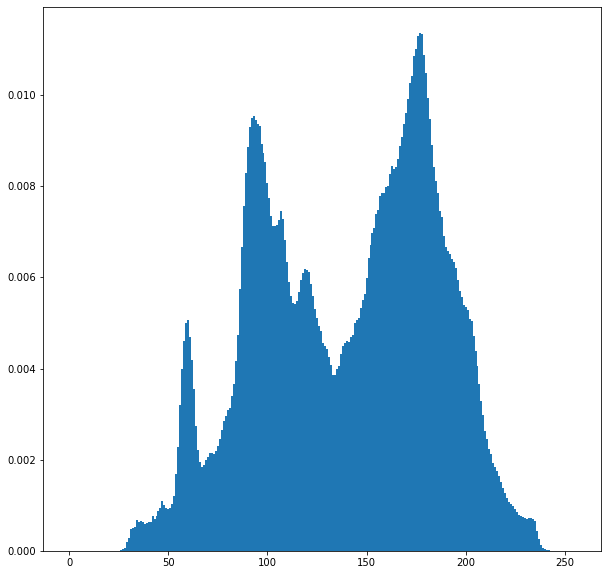

In [14]:
plt.figure(figsize = (10, 10))
plt.bar(range(256), histogramData, 1)

In [15]:
t = 140
top = np.zeros(imageShape)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        if grayImage[i, j] > t:
            top[i, j] = 1

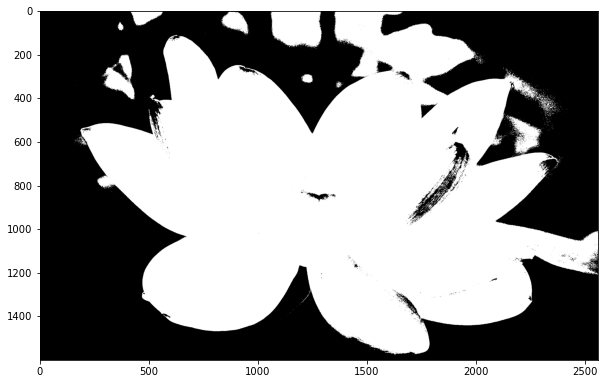

In [16]:
showImage(top)

In [17]:
down = np.zeros(imageShape)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        if grayImage[i, j] < t:
            down[i, j] = 1

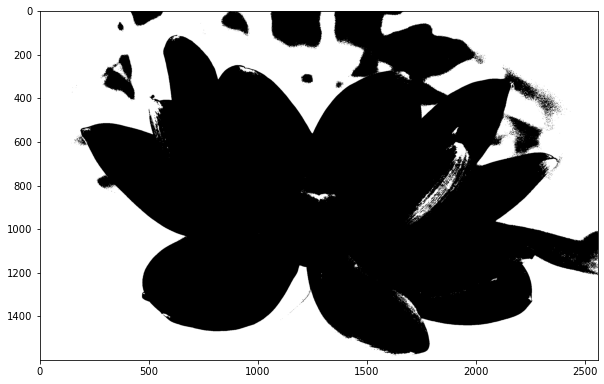

In [18]:
showImage(down)

In [19]:
b = 140
t = 230
inside = np.zeros(imageShape)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        if b < grayImage[i, j] and grayImage[i, j] < t:
            inside[i, j] = 1

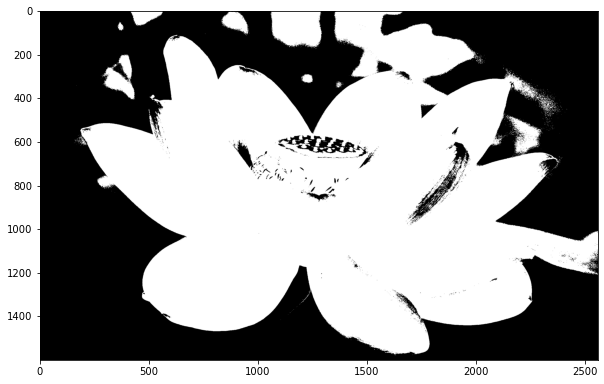

In [20]:
showImage(inside)

In [21]:
mg = 0
for i in range(r):
    mg = mg + i * histogramData[i]
print('mg = ', mg)

mg =  140.2675212402344


In [22]:
p1k = np.zeros(r, np.float64)
prob = 0
for i in range(r):
    prob = prob + histogramData[i]
    p1k[i] = prob

In [23]:
mk = np.zeros(r, np.float64)
mi = 0
for i in range(r):
    mi = mi + i * histogramData[i]
    mk[i] = mi

In [24]:
f = lambda p1ki, mki: ((mg * p1ki - mki) * (mg * p1ki - mki)) / (p1ki * (1 - p1ki))

In [25]:
m = 0
maxArgs = []
for i in range(r):
    if p1k[i] > 0.01 and p1k[i] < 0.99:        
        value = f(p1k[i], mk[i])
        if value == m:
            maxArgs.append(i)
        if value > m:
            maxArgs = []
            maxArgs.append(i)
            m = value

In [26]:
print(maxArgs)

[136]


In [27]:
t = int(np.sum(maxArgs) / len(maxArgs))
print(t)

136


In [28]:
otsu = np.zeros(imageShape)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        if grayImage[i, j] > t:
            otsu[i, j] = 1

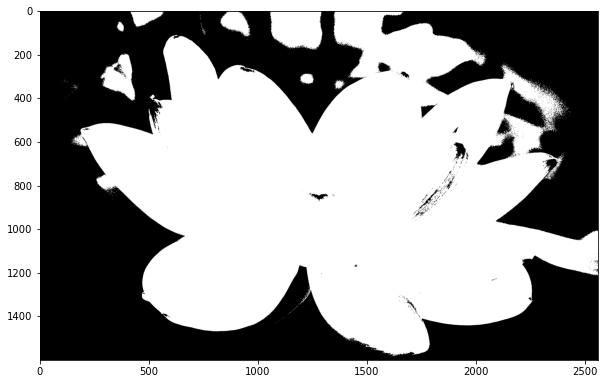

In [29]:
showImage(otsu)

In [30]:
rows = 2
columns = 5
partHeight = int(imageShape[0] / rows)
partWidth = int(imageShape[1] / columns)
print(partWidth)

512


In [31]:
def histogram(image1):
    histogram1 = np.zeros(r, np.uint16)
    imageShape1 = image1.shape
    for i in range(imageShape1[0]):
        for j in range(imageShape1[1]):
            index1 = image1[i, j]
            histogram1[index1] = histogram1[index1] + 1
    histogram1 = histogram1 / (imageShape1[0] * imageShape1[1])
    return histogram1

In [32]:
def plotHistogram(histogram1):
    plt.figure(figsize = (4, 4))    
    plt.bar(range(r), histogram1, 1)

In [33]:
def calcMg(hist1):
    hs = hist1.shape[0]
    mg1 = 0
    for i in range(hs):
        mg1 = mg1 + i * hist1[i]    
    return mg1

In [34]:
def calcP1k(hist1):
    hs = hist1.shape[0]
    p1k1 = np.zeros(hs, np.float64)
    prob1 = 0
    for i in range(hs):
        prob1 = prob1 + hist1[i]
        p1k1[i] = prob1        
    return p1k1

In [35]:
def calcMk1(hist1):
    hs = hist1.shape[0]
    mk1 = np.zeros(hs, np.float64)
    mi1 = 0
    for i in range(hs):
        mi1 = mi1 + i * hist1[i]
        mk1[i] = mi1    
    return mk1

In [36]:
f1 = lambda mg1, p1ki, mki: ((mg1 * p1ki - mki) * (mg1 * p1ki - mki)) / (p1ki * (1 - p1ki))

In [37]:
border = 0

In [56]:
def getT(hist1, mghw1, p1khw1, mk1hw1):
    m = 0
    hs = hist1.shape[0]
    maxArgs = []
    for i in range(hs):
        if p1khw1[i] > 0.01 and p1khw1[i] < 0.99:        
            value = f1(mghw1, p1khw1[i], mk1hw1[i])
            if value == m:
                maxArgs.append(i)
            if value > m:
                maxArgs = []
                maxArgs.append(i)
                m = value            
    if m < border:
        return -1;
    t1 = int(np.sum(maxArgs) / len(maxArgs))
    print('t = ', t1)
    return t1

t =  134
t =  145
t =  155
t =  157
t =  124
t =  130
t =  141
t =  121
t =  114
t =  113


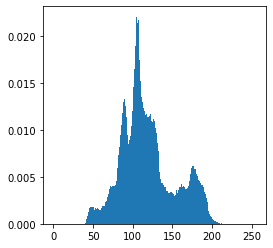

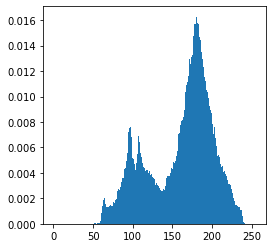

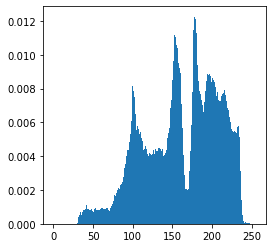

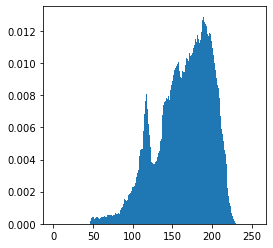

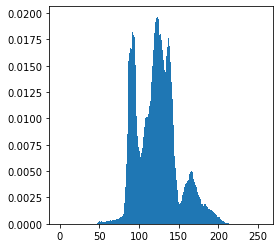

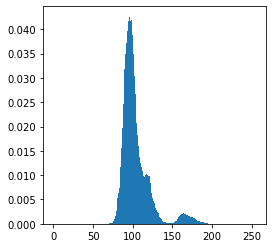

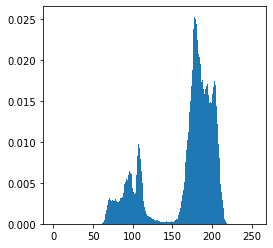

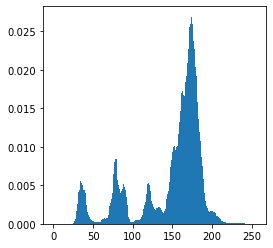

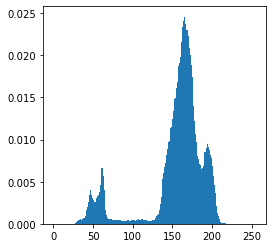

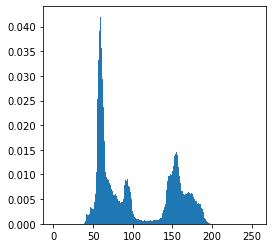

In [57]:
tlist = []
for h in range(rows):
    for w in range(columns):
        z = np.zeros((partHeight, partWidth), np.uint16)
        for y in range(partHeight):
            for x in range(partWidth):
                z[y, x] = grayImage[h * partHeight + y, w * partWidth + x]
        hist = histogram(z)
        plotHistogram(hist)
        mghw = calcMg(hist)
        p1khw = calcP1k(hist)
        mk1hw = calcMk1(hist)
        thw = getT(hist, mghw, p1khw, mk1hw)       
        tlist.append(thw)

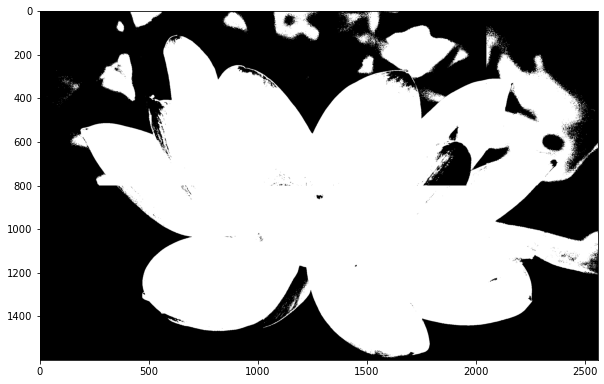

In [40]:
otsu2 = np.zeros(imageShape)
for h in range(rows):
    for w in range(columns):       
        for y in range(partHeight):
            for x in range(partWidth):
                if grayImage[h * partHeight + y, w * partWidth + x] > tlist[h * rows + w]:
                    otsu2[h * partHeight + y, w * partWidth + x] = 1
showImage(otsu2)

In [41]:
hd = histogramData.copy()

In [42]:
border = 50
start = 0

In [43]:
def koeff(hist):
    size = hist.shape[0]
    s = 0
    for i in range(size):
        s = s + hist[i]
    return 1 / s

In [63]:
hierarchical_t = []
def hierarchicalMethodOtsu(h_histogram, start2):         
    mghw2 = calcMg(h_histogram)
    p1khw2 = calcP1k(h_histogram)
    mk1hw2 = calcMk1(h_histogram)
    thw2 = getT(h_histogram, mghw2, p1khw2, mk1hw2)       
    length = len(h_histogram)
    if thw2 > 0:   
        hierarchical_t.append(start2 + thw2)
        print('start2 =', start2, 'thw = ', thw2)
        new_histo1 = h_histogram[0: thw2 - 1]
        k = koeff(new_histo1)
        new_histo1 = new_histo1 * k  
        hierarchicalMethodOtsu(new_histo1, start2)
        new_histo2 = h_histogram[thw2: length]  
        k = koeff(new_histo2)
        new_histo2 = new_histo2 * k
        hierarchicalMethodOtsu(new_histo2, start2 + thw2)
        
        
        

In [64]:
hierarchicalMethodOtsu(hd, start)

t =  136
start2 = 0 thw =  136
t =  87
start2 = 0 thw =  87
t =  66
start2 = 0 thw =  66
t =  49
start2 = 0 thw =  49
t =  22
start2 = 87 thw =  22
t =  40
start2 = 136 thw =  40
t =  20
start2 = 136 thw =  20
t =  20
start2 = 176 thw =  20
t =  16
start2 = 196 thw =  16


In [65]:
print(hierarchical_t)

[136, 87, 66, 49, 109, 176, 156, 196, 212]


In [66]:
hierarchical_t.append(255)

In [67]:
hierarchical_t.sort()
print(hierarchical_t)

[49, 66, 87, 109, 136, 156, 176, 196, 212, 255]


<BarContainer object of 256 artists>

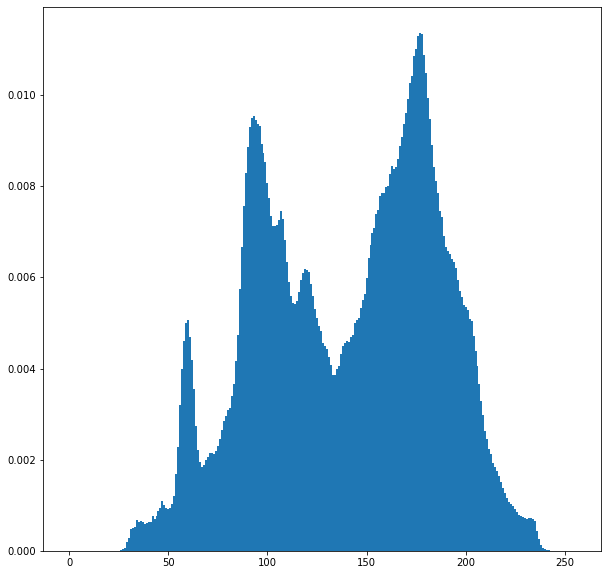

In [70]:
plt.figure(figsize = (10, 10))
plt.bar(range(256), histogramData, 1)

In [68]:
lengthOfThresholdArray = len(hierarchical_t)
hOtsu = np.zeros(imageShape, np.uint16)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        for x in range(lengthOfThresholdArray - 1, -1, -1):
            if grayImage[i, j] <= hierarchical_t[x]:
                hOtsu[i, j] = hierarchical_t[x]

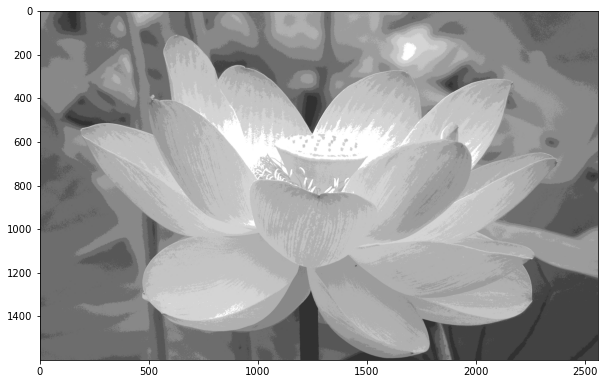

In [69]:
showImage(hOtsu)

In [77]:
levels = 5
step = 255 / levels
quantization = np.zeros(imageShape, np.uint16)
for i in range(imageShape[0]):
    for j in range(imageShape[1]):
        quantization[i, j] = int(step * math.ceil(grayImage[i, j] / step))

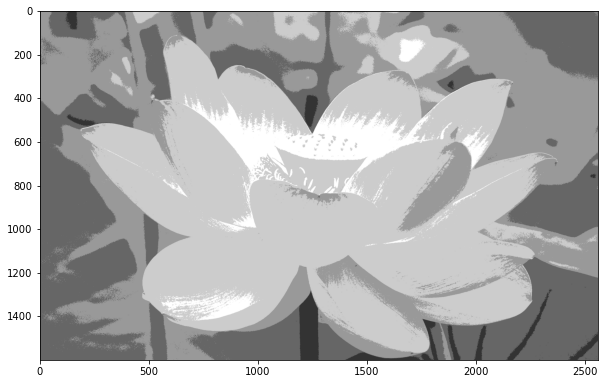

In [78]:
showImage(quantization)